In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

!pip install contractions
import contractions


**Chargement du fichier csv**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving bbc-text.csv to bbc-text (2).csv


In [5]:
import io
df_train= pd.read_csv(io.BytesIO(uploaded['bbc-text.csv']),encoding="ISO-8859-1")

**Exploration des données**

In [6]:
df_train.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [7]:
df_train["len"]= df_train["text"].apply(lambda x : len(x))

In [8]:
df_train["category"].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [9]:
average_len_tech= df_train[df_train["category"]=="tech"]["len"].mean()
average_len_business= df_train[df_train["category"]=="business"]["len"].mean()
average_len_enter= df_train[df_train["category"]=="entertainment"]["len"].mean()
average_len_politics= df_train[df_train["category"]=="politics"]["len"].mean()
average_len_sport= df_train[df_train["category"]=="sport"]["len"].mean()

In [10]:
print("average len of tech text", average_len_tech)
print("average len of business text", average_len_business)
print("average len of entertainment text", average_len_enter)
print("average len of politic text", average_len_politics)
print("average len of sport text", average_len_sport)


average len of tech text 2974.633416458853
average len of business text 1985.5549019607843
average len of entertainment text 1927.2020725388602
average len of politic text 2682.7410071942445
average len of sport text 1895.0528375733854


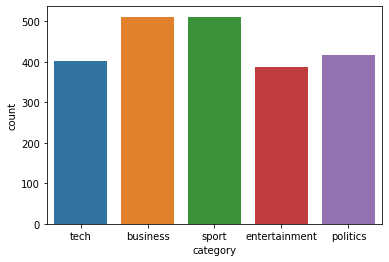

In [11]:
sns.countplot(x="category",data=df_train)

**Pretraitement des données**

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_train["category"] = encoder.fit_transform(df_train["category"])

In [13]:
df_train=df_train[["category","text"]]

In [14]:
#delete duplicates
df_train.dropna(inplace=True)

In [15]:
import re
df_train["text"]=df_train["text"].apply(lambda x: x.lower())
df_train["text"]=df_train["text"].apply(lambda x: contractions.fix(x))
df_train["text"]=df_train["text"].apply(lambda x: re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)',' ', x))

In [16]:
import nltk
nltk.download('wordnet')

def stemming(corpus):
    
    corpus_=""
    
    ps = nltk.stem.porter.PorterStemmer()
    for mot in corpus.split():
        corpus_=corpus_ + " " + ps.stem(mot) + " "
        
    return corpus_

def lemmatisation(corpus):
    corpus_=""
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    for mot in corpus.split():
        corpus_=corpus_ + " " + lem.lemmatize(mot) + " "
    return corpus_

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
import nltk 
from nltk.corpus import stopwords

def remove_stopwords(corpus):
    corpus_=""
    for mot in corpus.split():
        if mot not in stopwords.words('english'):
            corpus_=corpus_ + " " + mot
        else:
            corpus_=corpus_ + " "
    return corpus_


In [18]:
df_train["text"]=df_train["text"].apply(lambda x: stemming(x))
df_train["text"]=df_train["text"].apply(lambda x: lemmatisation(x))

In [19]:
import nltk
nltk.download('stopwords')
  
df_train["text"]=df_train["text"].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

#tokenization 
vectorizer=TfidfVectorizer(max_features=5000,stop_words='english')
X=vectorizer.fit_transform(df_train["text"])
Y=df_train["category"]

**Modélisation avec Sklearn**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1780, 5000) (1780,)
(445, 5000) (445,)


In [22]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))

accuracy 0.9662921348314607
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       101
           1       1.00      0.96      0.98        81
           2       0.93      0.98      0.95        83
           3       0.97      1.00      0.98        98
           4       0.98      0.96      0.97        82

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445

Confusion Matrix: 
 [[94  0  5  1  1]
 [ 1 78  1  0  1]
 [ 2  0 81  0  0]
 [ 0  0  0 98  0]
 [ 1  0  0  2 79]]


In [23]:
from sklearn.naive_bayes import MultinomialNB
MB=MultinomialNB()
MB.fit(X_train,y_train)
y_pred=MB.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))

accuracy 0.9640449438202248
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       101
           1       1.00      0.93      0.96        81
           2       0.92      0.98      0.95        83
           3       0.97      1.00      0.98        98
           4       0.98      0.98      0.98        82

    accuracy                           0.96       445
   macro avg       0.97      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445

Confusion Matrix: 
 [[95  0  5  1  0]
 [ 2 75  2  0  2]
 [ 2  0 81  0  0]
 [ 0  0  0 98  0]
 [ 0  0  0  2 80]]


**Modélisation avec Keras**

In [24]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_features = 5000
trunc_type = 'post'
padding_type = 'post'
tokenizer = Tokenizer(num_words=max_features,oov_token="<OOV>")
tokenizer.fit_on_texts(df_train['text'])
list_tokenized_train = tokenizer.texts_to_sequences(df_train['text'])

maxlen = 128
X = pad_sequences(list_tokenized_train, maxlen=maxlen,truncating=trunc_type,padding="post")
Y = df_train['category']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1780, 128) (1780,)
(445, 128) (445,)


In [26]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional,GlobalMaxPool1D,Dropout
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

model = Sequential()
model.add(Embedding(5000, 128))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128,dropout=0.5,recurrent_dropout=0.5,return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64,dropout=0.5,recurrent_dropout=0.5,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         640000    
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        263168    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, None, 256)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 128)        164352    
 nal)                                                            
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0

In [27]:
epochs = 10
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
23/23 [==============================] - 58s 2s/step - loss: 1.5875 - accuracy: 0.2570 - val_loss: 1.5242 - val_accuracy: 0.3708
Epoch 2/10
23/23 [==============================] - 45s 2s/step - loss: 1.1418 - accuracy: 0.5028 - val_loss: 0.8688 - val_accuracy: 0.7107
Epoch 3/10
23/23 [==============================] - 45s 2s/step - loss: 0.6274 - accuracy: 0.8006 - val_loss: 0.5792 - val_accuracy: 0.7612
Epoch 4/10
23/23 [==============================] - 45s 2s/step - loss: 0.3247 - accuracy: 0.8982 - val_loss: 0.3327 - val_accuracy: 0.8933
Epoch 5/10
23/23 [==============================] - 45s 2s/step - loss: 0.1368 - accuracy: 0.9607 - val_loss: 0.2447 - val_accuracy: 0.9298
Epoch 6/10
23/23 [==============================] - 45s 2s/step - loss: 0.0942 - accuracy: 0.9740 - val_loss: 0.2027 - val_accuracy: 0.9382
Epoch 7/10
23/23 [==============================] - 45s 2s/step - loss: 0.0474 - accuracy: 0.9874 - val_loss: 0.1842 - val_accuracy: 0.9551
Epoch 8/10
23/23 [==

In [28]:
model.evaluate(X_test,y_test)

14/14 [==============================] - 2s 167ms/step - loss: 0.1920 - accuracy: 0.9461


[0.19203005731105804, 0.9460673928260803]

**Visualisations**

In [35]:
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(history):
    
    """
    
    Plot loss and accuracy in order to see if we observe an overfitting
    
    """
    figure = plt.figure(figsize=(10,10))

    # accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'go--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'yo--', label = "val acc")
    
    plt.title("train_acc vs val_acc")
    
   
    #names axis
    plt.xlabel("epcs")
    plt.ylabel("acc")
    plt.legend()

    # loss
    plt.subplot(222)
    plt.plot(history.history['loss'],'go--', label = "loss")
    plt.plot(history.history['val_loss'], 'yo--', label = "val_loss")
    
    plt.title("train_loss vs val_loss")
    
    #names axis
    plt.ylabel("loss")
    plt.xlabel("epcs")

    plt.legend()
    plt.show()
    

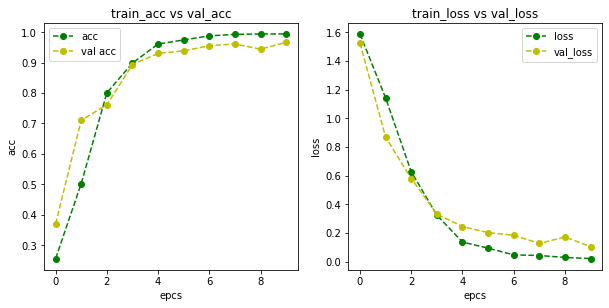

In [36]:
plot_loss_and_accuracy(history)


**Tests sur des articles inconnus**

In [37]:
txt1="The collaboration uses artificial intelligence to map the site, and augmented reality to help restore the original home of the Olympic Games.It will allow viewers to explore the area as it stood more than 2,000 years ago.Microsoft has ambitions to rival Facebook with its own plans for the so-called metaverse.It recently announced Microsoft Teams metaverse for meetings and is keen to transform Minecraft and other games it owns into more immersive 3D worlds.Its tie-up with the Greek government means people can tour the site remotely or in person with an augmented-reality mobile app. At the Olympic Museum in Athens they can use HoloLens headsets to overlay a digital version of the site.Microsoft's augmented reality smart glasses HoloLens use multiple sensors, advanced optics, and holograms, to display information, blend with the real world or simulate a virtual world.Among the 27 monuments to be preserved are the original Olympic Stadium, the temples of Zeus and Hera, and the workshop of the renowned sculptor Phidias.The buildings are as close as possible to their original forms and include historical timelines of the site's changes over time, and depictions of artefacts from each period.Through its AI for Cultural Heritage initiative, Microsoft partnered technology company Iconem, which specializes in digitising historic sites in 3D.Using on-the-ground cameras and drones to take hundreds of thousands of images of the site, Microsoft AI then processed the pictures to create models.’The cultural implications of this technology are endless. For the first time, visitors from around the world can virtually visit the birthplace of democracy, the ancient site of Olympia, and experience history first hand,' said the Greek Prime Minister, Kyriakos Mitsotakis.Brad Smith, the president of Microsoft said: The project to digitally preserve Ancient Olympia is a stunning achievement in cultural heritage, bringing together humanity and cutting-edge technology to benefit the world, and empower coming generations with new ways to explore our past."

In [38]:
txt2="The Swedish band's long-awaited Voyage - their first album of new material for 40 years - shot straight to number one, earning them the biggest opening week of sales for any album in four years.Its 204,000 first-week chart sales is the highest since Ed Sheeran's Divide.Abba's last studio album, 1981's The Visitors, also topped the chart.The former Eurovision winners have since hit number one with their greatest hits collections, The Singles and Gold.‘We are so happy that our fans seem to have enjoyed our new album as much as we enjoyed making it,’ they told the Official Charts Company.‘We are absolutely over the moon to have an album at the top of the charts again.’The album is also the fastest-selling LP released by a group in eight years, since One Direction's Midnight Memories. Aside from Abba, Sheeran and One Direction, only Adele's 25 has breached the 200,000 barrier for first-week sales in the past decade.Voyage is also the fastest-selling vinyl release of the century, overtaking the Arctic Monkeys' Tranquillity Base Hotel & Casino from 2018.Only The Beatles and Elvis have now spent longer at number one than Agnetha, While it's clearly been a hit with music fans, the 10-track album Voyage divided opinion among critics.‘It's vintage Abba, on par with their classic 1970s run,’ declared Rolling Stone in a four-star review. But The Guardian's two-star write-up said it was a 'disappointment' that languishes in ‘often bafflingly retrograde settings’.Here we go again! Abba announce a new album and concerts - with a differenceOn Friday, Abba singer Anni-Frid Lyngstad told the BBC' don't be too sure' that their comeback album is their last, in her first interview about the reunion.‘I have learned to say never to say never,’ she told BBC Radio 2's Zoe Ball about the prospect of future projects.Elsewhere on Friday, another returning star, Adele, secured a fourth consecutive week at the top of the singles chart with Easy on Me.The ballad was the first track to be released from her hotly-anticipated fourth album, which will be released next Friday, 19 November.Easy on Me held off strong competition from Sheeran, who kept second and third spots on the singles rundown with Shivers and Bad Habits respectively, while his latest album = (Equals) was knocked into second place on the album chart by Abba."

In [39]:
def traitement(txt):
  txt = txt.lower()
  txt=contractions.fix(txt)
  txt =  re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)',' ', txt)
  txt=stemming(txt)
  txt=lemmatisation(txt)
  txt=remove_stopwords(txt)

  return txt

In [40]:
txt=[txt1,txt2]
labels = encoder.classes_
print(labels)
for text in txt: 
  t=[traitement(text)]
  seq = tokenizer.texts_to_sequences(t)
  padded = pad_sequences(seq, maxlen=128)
  pred = model.predict(padded)
  print("output softmax: ",pred)
  print("category : " ,labels[np.argmax(pred)])



['business' 'entertainment' 'politics' 'sport' 'tech']
output softmax:  [[0.00129748 0.00670888 0.00275132 0.01113651 0.9781058 ]]
category :  tech
output softmax:  [[1.1665020e-03 9.9765366e-01 9.8657889e-05 3.2291378e-04 7.5825676e-04]]
category :  entertainment
